In [2]:
import ase.io
import numpy as np
from lammps import lammps
from lammps.numpy_wrapper import numpy_wrapper
import matplotlib.pyplot as plt

In [32]:
atoms = ase.io.read("/home/xuke/Researches/CompuphysBook/sampleMD/sampleMD/chapters/DLC/dis.dump")
atoms.cell

Cell([16.0, 16.0, 16.0])

In [33]:
lmp=lammps()
lmp.file('in.1')
lmp_numpy = numpy_wrapper(lmp)

LAMMPS (29 Sep 2021 - Update 3)
Lattice spacing in x,y,z = 3.2000000 3.2000000 3.2000000
Created orthogonal box = (0.0000000 0.0000000 0.0000000) to (32.000000 32.000000 32.000000)
  1 by 1 by 1 MPI processor grid
Scanning dump file ...
Reading snapshot from dump file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (16.000000 16.000000 16.000000)
  0 atoms before read
  250 atoms in snapshot
  0 atoms purged
  0 atoms replaced
  0 atoms trimmed
  250 atoms added
  250 atoms after read
Neighbor list info ...
  update every 1 steps, delay 10 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.7
  ghost atom cutoff = 7.7
  binsize = 3.85, bins = 5 5 5
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time 

In [34]:
rs = lmp_numpy.extract_atom("x").copy()
ids = lmp_numpy.extract_atom("id").copy()
fs = lmp_numpy.extract_atom("f").copy()

In [35]:
ids

array([  2,  13,  51,  53,  63,  52, 101, 102, 103, 111, 113, 152, 163,
         3, 202, 203, 213,  12,  21,  22,  73,  62, 112, 123, 122, 162,
       173,  23, 212, 221, 222, 223,  32,  81,  83,  72,  82, 132, 133,
       172, 182, 183,  33, 232, 233,  42,  43,  93,  92, 142, 143, 151,
       153, 191, 192, 193, 201, 241, 242, 243,   4,  15,  65,  54,  56,
       105, 115, 104, 154, 165, 204, 205, 206, 215,  14,  16,  24,  25,
        26,  75,  64,  74, 125, 114, 126, 164, 166, 174, 175, 214, 224,
       225,  34,  35,  85,  76,  84, 124, 134, 135, 184, 185, 234, 235,
       236,  44,  55,  95,  94,  96, 144, 145, 146, 155, 194, 195,   5,
        45, 244, 245, 246,   6,   8,  17,  67,  58, 108, 117, 106, 156,
       158, 167,   7, 207, 208, 217,  18,  27,  77,  66,  68, 118, 127,
       116, 128, 168, 177, 178, 216, 218, 226, 227, 228,  28,  36,  38,
        87,  78,  86,  88, 136, 137, 138, 176, 186, 187, 188,  37, 237,
       238,  46,  47,  48,  57,  97,  98, 107, 147, 148, 157, 19

In [36]:
virial = np.sum(- rs[:,0] * fs[:,0])/16**3*160.21766208

In [38]:
lmp_numpy.extract_variable("pe")/250

-8.830431199827563

In [39]:
lmp=lammps()
lmp.file('in.2')
lmp_numpy = numpy_wrapper(lmp)

LAMMPS (29 Sep 2021 - Update 3)
Lattice spacing in x,y,z = 3.2000000 3.2000000 3.2000000
Created orthogonal box = (0.0000000 0.0000000 0.0000000) to (32.000000 32.000000 32.000000)
  1 by 1 by 1 MPI processor grid
Scanning dump file ...
Reading snapshot from dump file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (16.000000 16.000000 16.000000)
  0 atoms before read
  250 atoms in snapshot
  0 atoms purged
  0 atoms replaced
  0 atoms trimmed
  250 atoms added
  250 atoms after read
Neighbor list info ...
  update every 1 steps, delay 10 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.7
  ghost atom cutoff = 7.7
  binsize = 3.85, bins = 5 5 5
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time 

In [40]:
lmp_numpy.extract_variable("pe")

-2106.186356602114

In [41]:
ids2 = lmp_numpy.extract_atom("id").copy()
fs2 = lmp_numpy.extract_atom("f").copy()

In [42]:
df = fs-fs2

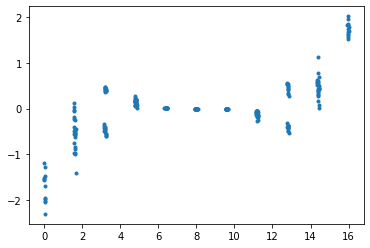

In [48]:
plt.plot(rs[:,0],df[:,0],'.')

In [52]:
mask1 = rs[:,0]<8
mask2 = rs[:,0]>=8
ff = np.sum((fs-fs2)[mask2])/256*160.21766208

In [53]:
ff+virial

18.877108439093128

In [46]:
np.sum((fs-fs2)[mask2])

32.8538057138495

In [47]:
np.sum((fs-fs2)[mask1])

-32.85380571384951